[Decision tree tutorial](https://www.youtube.com/watch?v=JgRA0g2gtl0)

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

Create a random array of data with 4 target class variables and some Gaussian noise (0.5*np.random.randn(x,y). 

In [2]:
X1 = [-1,-1] + 0.5*np.random.randn(50,2)
y1 = np.ones(50)

X2 = [-1,1] + 0.5*np.random.randn(50,2)
y2 = 2*np.ones(50)

X3 = [1,-1] + 0.5*np.random.randn(50,2)
y3 = 3*np.ones(50)  #centered around 3...

X4 = [1,1] + 0.5*np.random.randn(50,2)
y4 = 4*np.ones(50) #Centered around 4...

Stack X variables onto one vertical stack using np.vstack                                                                       
Stack y variables onto one horizontal stack using np.hstack                                                                     
This is done to fit the data along a singular axis to train the model later down the road.

In [22]:
X = np.vstack([X1,X2,X3,X4])
y = np.hstack([y1,y2,y3,y4])

Check the shapes to ensure data is fitting correctly along the X axis.

In [23]:
X.shape

(200, 2)

In [24]:
y.shape

(200,)

Initialize the Decision tree and train your model using .fit Passing parameters to the decision tree like max depth will determine how many levels the tree will split into. 

In [6]:
tree_classifier = DecisionTreeClassifier(max_depth=2)
tree_classifier.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [7]:
!pip install graphviz

[graphviz](https://graphviz.org/)

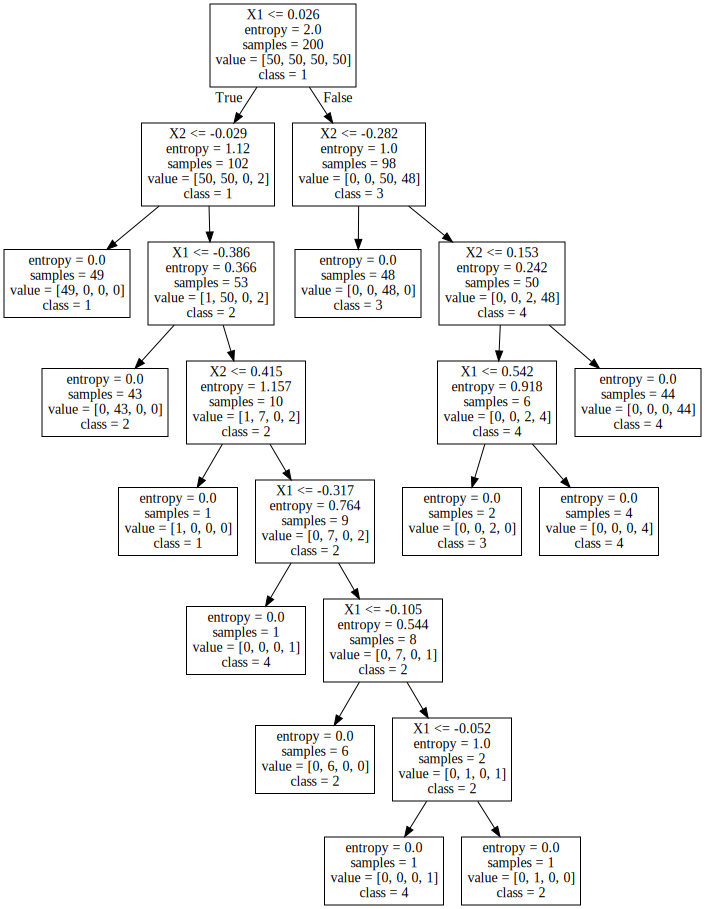

In [16]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(tree_classifier,feature_names=['X1','X2'],class_names=np.array(['1','2','3','4']))
graphviz.Source(data)

gini sampling is basically, if X < some threshold, then true, o/w, false. In the next example, I use "entropy" as the decision tree split classifier instead of gini impurity, and I also remove the max row depth just to see what it does. 

In [9]:
tree_classifier = DecisionTreeClassifier('entropy')
tree_classifier.fit(X,y)

C:\Users\burne\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=entropy as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


DecisionTreeClassifier(criterion='entropy')

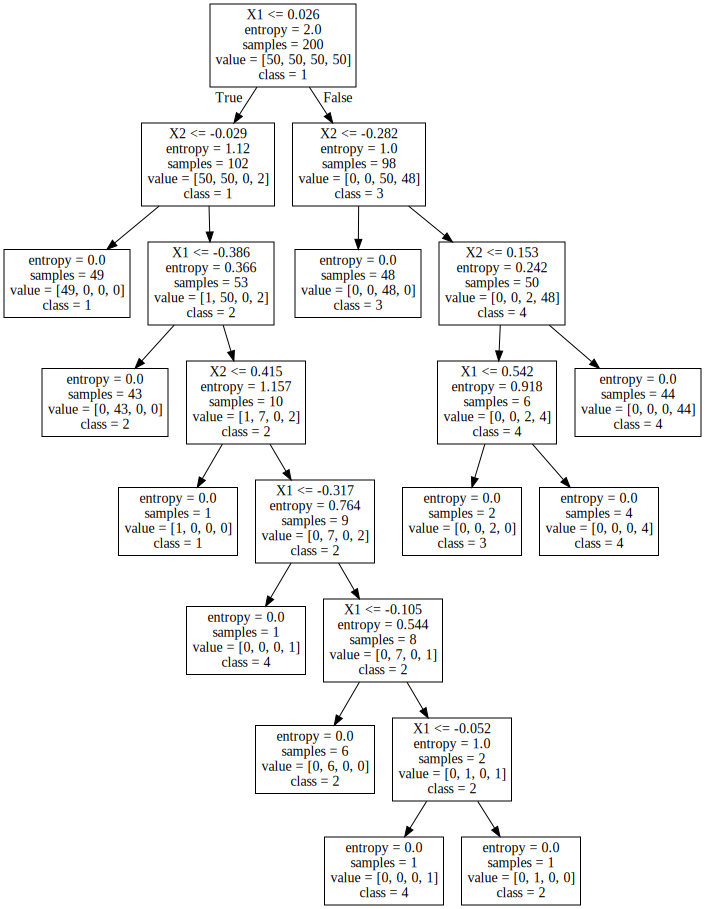

In [10]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(tree_classifier,feature_names=['X1','X2'],class_names=np.array(['1','2','3','4']))
graphviz.Source(data)

Plotting Decision boundaries is next. 

In [12]:
from matplotlib.colors import ListedColormap

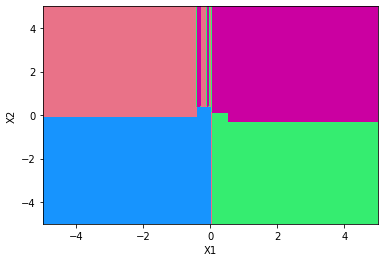

In [26]:
def plotMyTreeBoundaries(X,y,treeClassifier):
    #passing x and y data from -5 to 5 wth 200 samples
    x1_axis = np.linspace(-5,5,200)
    x2_axis = np.linspace(-5,5,200)
    # at each grid point,define grid points, and pass axis points
    x_grid_1, x_grid_2 = np.meshgrid(x1_axis,x2_axis)
    # concancetanate the strings together
    x_grid = np.c_[x_grid_1.ravel(), x_grid_2.ravel()]
    # going to make predictions for each data point using tree classifier
    y_pred = treeClassifier.predict(x_grid).reshape(x_grid_1.shape)
    #Use hexadecimal coded colormaps to help pick colors [here](https://www.color-hex.com/)
    #create colormapping: will contain 4 colors (['#color']) 
    myColorMap = ListedColormap(['#1794fe','#e97288','#35ed70','#cb00a1'])
    plt.contourf(x_grid_1,x_grid_2,y_pred,cmap=myColorMap)
  
    plt.xlabel('X1')
    plt.ylabel('X2')
    
plt.figure()
plotMyTreeBoundaries(X=X,y=y,treeClassifier=tree_classifier)
plt.show()

Soft decision tree classifier: the probability of a certain sample belonging to a certain class. Lets predict the probability of a point belonging to the green section

In [27]:
tree_classifier.predict_proba([[3,-4]])

array([[0., 0., 1., 0.]])

The 1 denotes this is a 100% probability that some point belonging to that class, in fact, does. 

In [44]:
tree_classifier.predict_proba([[-0.1,0.1]])

array([[1., 0., 0., 0.]])

Using the gibbons matrix, rotate the data on the x axis

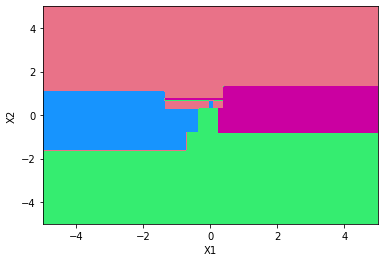

In [50]:
theta = 30 *np.pi/180
G = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
x_rotated = X.dot(G)

rotated_tree_classifier = DecisionTreeClassifier()
rotated_tree_classifier.fit(x_rotated,y)

plt.figure()
plotMyTreeBoundaries(X=x_rotated,y=y,treeClassifier=rotated_tree_classifier)
plt.show()

Decision trees are very sensitive to rotated data. they do not fit as well. There are ways around it, such as principal component analysis. Not going over that this time..

Decision Tree Regression w/ scikitLearn

At each node, we seek to find the min mse at each node, which is the difference between this and gini impurity and entropy

setting up test data

In [51]:
m=400
x=5*np.random.rand(m,1)
y=3*(x-1)**3
y=y+5*np.random.randn(m,1)

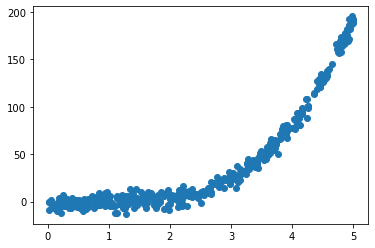

In [52]:
plt.plot(x,y,'o')

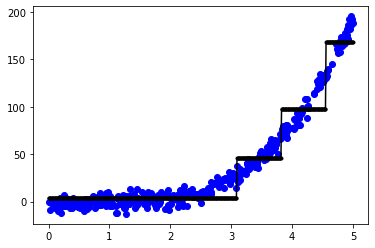

In [56]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor(max_depth=2)

treeReg.fit(x,y)

x1 = np.linspace(0,5,500).reshape(-1,1)
y_pred = treeReg.predict(x1)
plt.plot(x,y,'bo')
plt.plot(x1,y_pred,'k.-')

plt.show()

Decision boundaries are the vertical lines

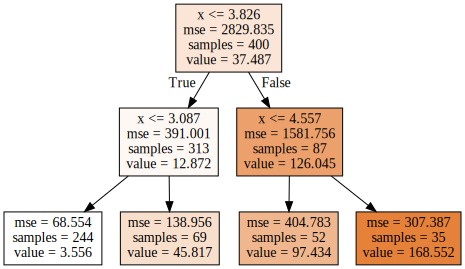

In [58]:
from sklearn import tree
import graphviz
data = tree.export_graphviz(treeReg,filled=True,feature_names=['x'])
graphviz.Source(data)